# Time Series Data

# Time series data

x axis is time.

In [2]:
import pandas
apple = pandas.read_csv('../Datasets/AAPL.csv', index_col='Date', parse_dates=['Date'])
# wmt = pandas.read_csv('../Datasets/WMT.csv', index_col='Date', parse_dates=['Date'])
passengers = pandas.read_csv('../Datasets/international-airline-passengers.csv',
                             index_col='Month', parse_dates=['Month'])
temperatures = pandas.read_csv('../Datasets/daily-min-temperatures.csv', 
                               index_col='Date', parse_dates=['Date'])

In [3]:
display(apple.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800


In [7]:
display(passengers.head(5))

,Total
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
display(temperatures.head(5))

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


### Data
+ stock prices (financial)
+ passengers (consumer data)
+ temperatures (physical)

Important time operations: (1) resample, (2) roll.

Suppose we want to group stock prices into months, and aggregate the data in each group.

Resampling is essentially grouping timeseries data into frequencies.

<AxesSubplot:xlabel='Date'>

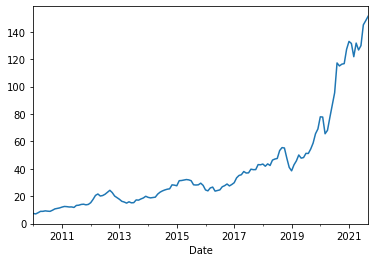

In [33]:
apple.Close.resample('M').mean().plot()

Date
2010-01-31    7.418402
2010-02-28    7.099850
2010-03-31    7.978960
2010-04-30    8.969592
2010-05-31    8.980768
Freq: M, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date', ylabel='Close'>

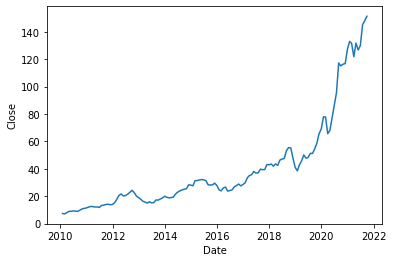

In [21]:
import seaborn as sns

display(apple['Close'].resample('M').mean().head())
sns.lineplot(data = apple['Close'].resample('M').mean())

In [22]:
display(apple['Close'].resample('Q').mean().head(8))

Date
2010-03-31     7.530539
2010-06-30     9.097817
2010-09-30     9.282327
2010-12-31    11.124810
2011-03-31    12.345829
2011-06-30    12.057585
2011-09-30    13.589654
2011-12-31    13.987806
Freq: Q-DEC, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date', ylabel='Close'>

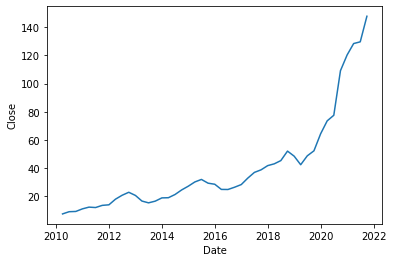

In [23]:
sns.lineplot(data = apple['Close'].resample('Q').mean())

<AxesSubplot:xlabel='Date'>

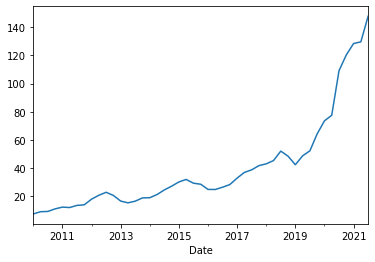

In [35]:
apple.Close.resample('Q').mean().plot()

<AxesSubplot:xlabel='Date'>

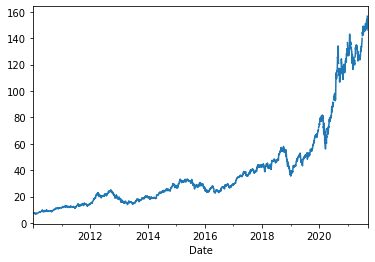

In [40]:
apple.Close.resample('B').mean().plot()

Task: compute/plot the return of investment for each month in this dataset (apple).

What is the monthly return of investment?

In [24]:
jan2010 = apple.Close['2010-01-04' : '2010-01-31']

In [26]:
(jan2010.iloc[-1] - jan2010.iloc[0])/jan2010.iloc[0] * 100

-10.256522975805732

In [53]:
100*(jan2010[-1] / jan2010[0] - 1)

-10.256522975805737

In [27]:
def roi(grp):
    return 100 *(grp.iloc[-1]/grp.iloc[0]-1).round(2)

<AxesSubplot:xlabel='Date', ylabel='Close'>

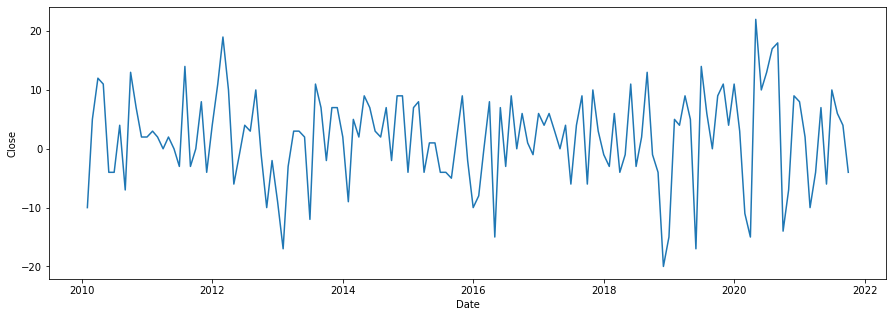

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
sns.lineplot(data = apple['Close'].resample('M').apply(roi))

We can compute monthly ROI by resampling.

In [68]:
def roi(d):
    return 100*(d[-1]/d[0]-1).round(2)

<AxesSubplot:xlabel='Date'>

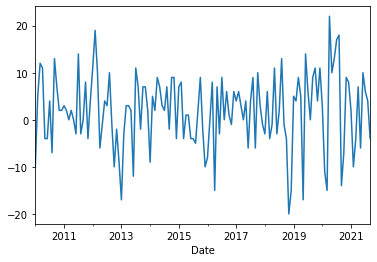

In [73]:
apple.Close.resample('M').aggregate(roi).plot()

<AxesSubplot:xlabel='Date'>

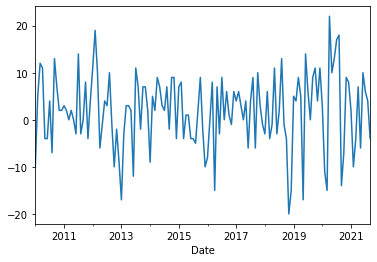

In [74]:
apple.Close.resample('M').aggregate(lambda d: 100*(d[-1]/d[0]-1).round(2)).plot()

Let's look at min and max prices.

<AxesSubplot:xlabel='Date'>

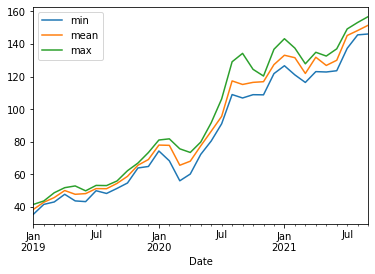

In [85]:
apple['2019':].Close.resample('M').agg(['min','mean','max']).plot()

<AxesSubplot:xlabel='Date'>

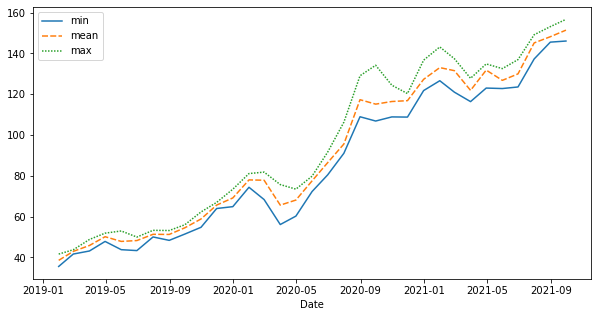

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
sns.lineplot(data = apple.loc['2019':, 'Close'].resample('M').agg(['min', 'mean', 'max']))

How to save this figure?

In [86]:
from matplotlib import pyplot

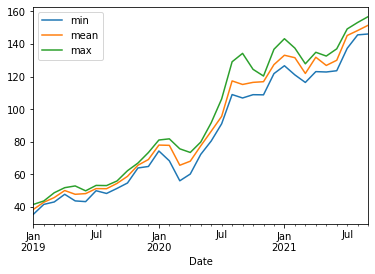

In [98]:
fig = apple['2019':].Close.resample('M').agg(['min','mean','max']).plot()
pyplot.savefig('apple2019_now.png', dpi=70)

Monthly ROI is not very "smooth".

To get a smoother analysis, we'll need to look at overlapping windows of data.

<AxesSubplot:xlabel='Date', ylabel='Close'>

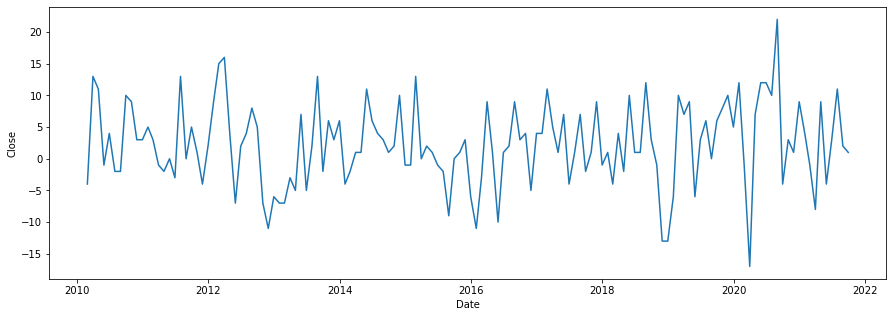

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
sns.lineplot(data = apple['Close'].rolling(window = 20).mean().resample('M').apply(roi))

<AxesSubplot:xlabel='Date'>

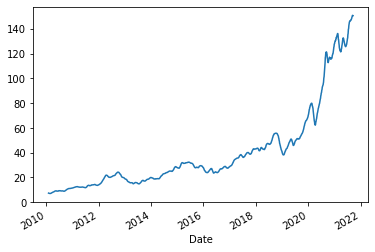

In [107]:
apple.Close.rolling(window=20).mean().plot()

In [108]:
def roi(d):
    return 100*(d[-1]/d[0]-1).round(2)

<AxesSubplot:xlabel='Date'>

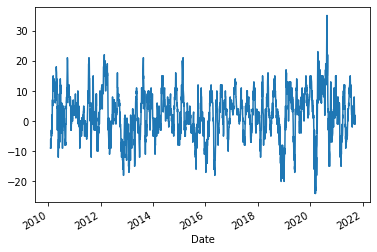

In [112]:
apple.Close.rolling(window=20).apply(roi).plot()

---

### Temperatures


<AxesSubplot:xlabel='Date'>

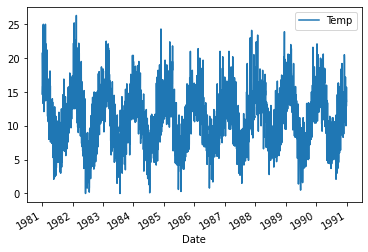

In [113]:
temperatures.plot()

c:\users\msaha1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

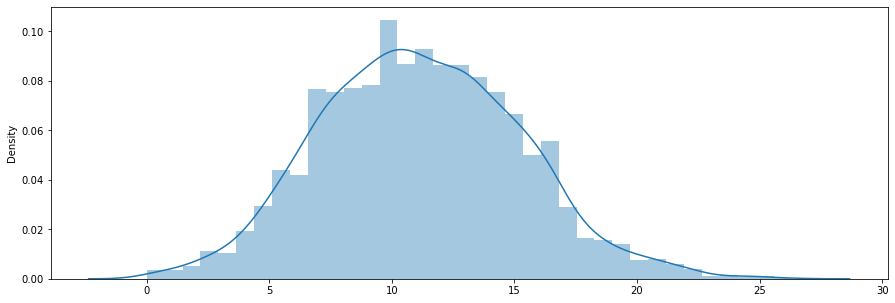

In [44]:
plt.figure(figsize = (15, 5))
sns.distplot(temperatures)

<AxesSubplot:xlabel='Date'>

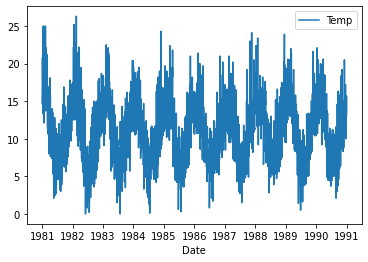

In [48]:
sns.lineplot(data = temperatures)

<AxesSubplot:xlabel='Date'>

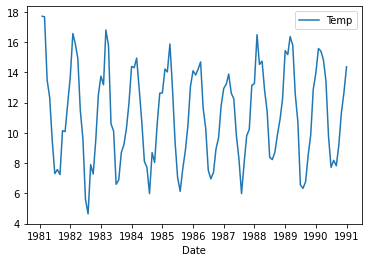

In [50]:
sns.lineplot(data = temperatures.resample('M').mean())

<AxesSubplot:xlabel='Date'>

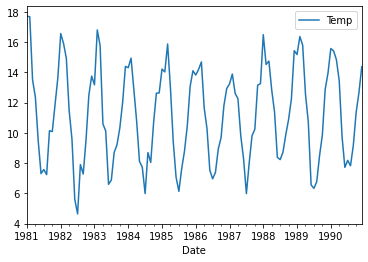

In [115]:
temperatures.resample('M').mean().plot()

In [118]:
temperatures.resample('M').mean()['1987-01-01': '1988-12-31']

,Temp
Date,
1987-01-31,13.235484
1987-02-28,13.889286
1987-03-31,12.619355
1987-04-30,12.250000
1987-05-31,9.806452
1987-06-30,8.273333
1987-07-31,5.983871
1987-08-31,8.022581
1987-09-30,9.810000


<AxesSubplot:xlabel='Date'>

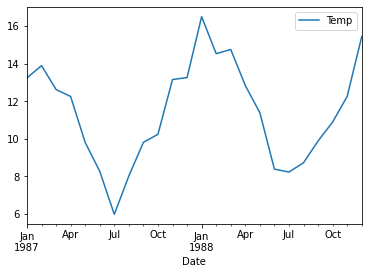

In [119]:
temperatures.resample('M').mean()['1987-01-01': '1988-12-31'].plot()

### Characteristics of time series

<AxesSubplot:xlabel='Date'>

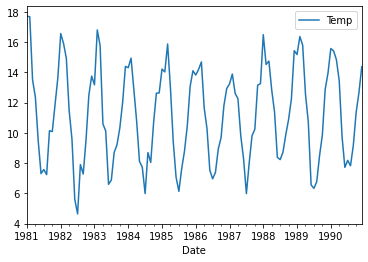

In [123]:
temperatures.resample('M').mean().plot()

<AxesSubplot:xlabel='Month'>

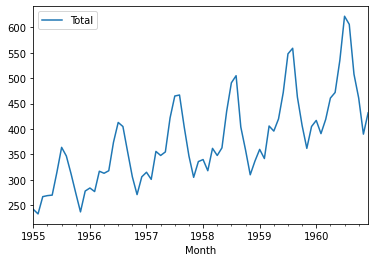

In [129]:
passengers['1955':'1960'].plot()

From this consumer data (airline passengers), we see both seasonality and trend.

<AxesSubplot:xlabel='Date'>

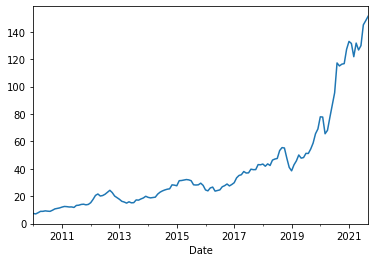

In [125]:
apple.Close.resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

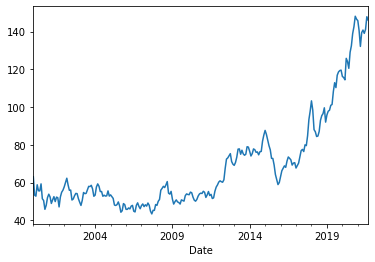

In [131]:
wmt.Close.resample('M').mean().plot()

Is there some seasonality in apple and wmt?

In [133]:
from pandas.plotting import autocorrelation_plot, lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

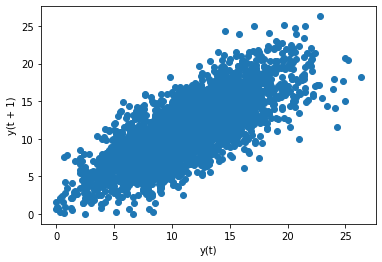

In [136]:
lag_plot(temperatures)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

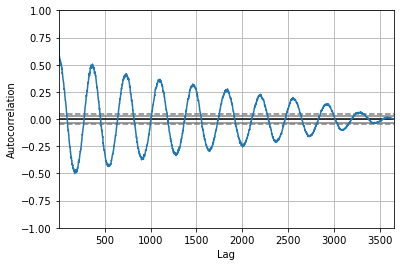

In [137]:
autocorrelation_plot(temperatures)

In [67]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

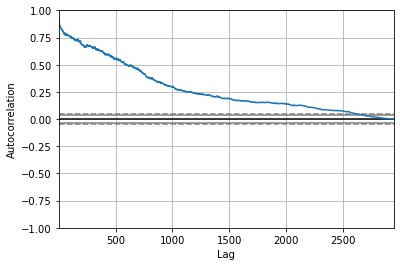

In [68]:
autocorrelation_plot(aapl)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

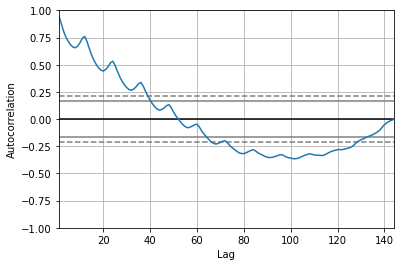

In [69]:
autocorrelation_plot(passengers)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

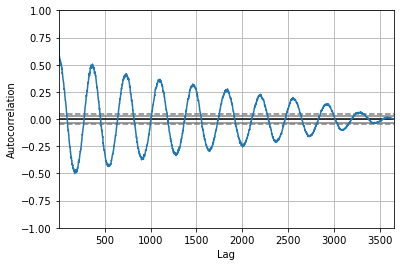

In [70]:
autocorrelation_plot(temperatures)

<AxesSubplot:xlabel='Date'>

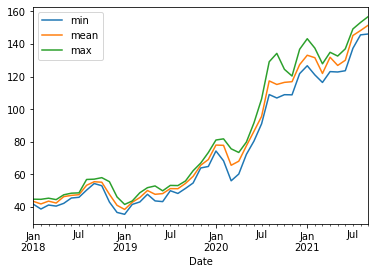

In [51]:
import pandas
aapl = pandas.read_csv('../Datasets/AAPL.csv', index_col='Date', parse_dates=['Date'])
aapl['2018':].Close.resample('M').agg(['min','mean','max']).plot()

In [73]:
import pandas as pd

df_apl = pd.read_csv(r"..\Datasets\AAPL.csv", index_col = 'Date', parse_dates = ['Date'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

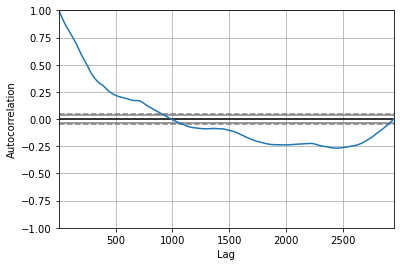

In [52]:
from pandas.plotting import autocorrelation_plot, lag_plot
autocorrelation_plot(aapl.Close)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

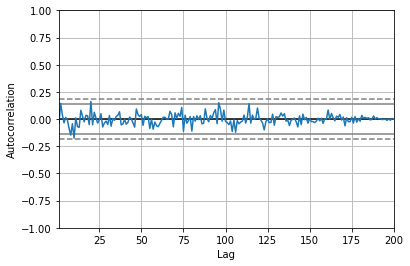

In [56]:
import numpy 
df = pandas.DataFrame()
df['just_random'] = [ numpy.random.random() for i in range(200) ]
df['quad'] = [ i*i for i in range(200) ]
df['quad_noise'] = [ i*i + 50*i*numpy.random.random() for i in range(200) ]
autocorrelation_plot(df['just_random'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 25)'>

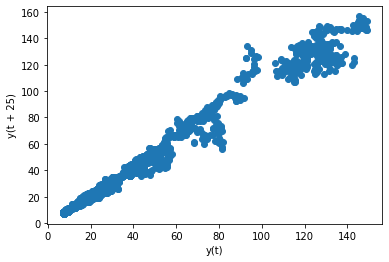

In [57]:
lag_plot(aapl.Close, lag=25)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 365)'>

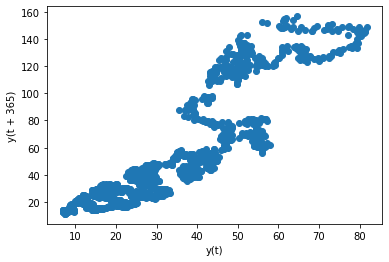

In [60]:
lag_plot(aapl.Close, lag=365)

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [63]:
passengers = pandas.read_csv('../Datasets/international-airline-passengers.csv', index_col='Month', parse_dates=True)
result = seasonal_decompose(passengers, model='additive', extrapolate_trend='freq')
result.trend + result.seasonal + result.resid

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Length: 144, dtype: float64

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

passengers = pd.read_csv(r"../Datasets/international-airline-passengers.csv", index_col = 'Month', parse_dates = ['Month'])
result = seasonal_decompose(passengers, model = 'additive', extrapolate_trend = 'freq')
result.seasonal + result.trend + result.resid

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Length: 144, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='seasonal'>

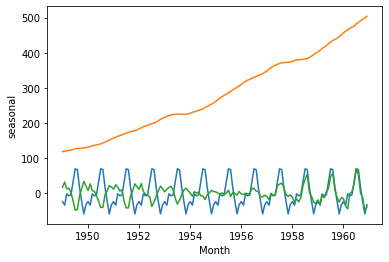

In [12]:
import seaborn as sns

sns.lineplot(data = result.seasonal)
sns.lineplot(data = result.trend)
sns.lineplot(data = result.resid)

<AxesSubplot:xlabel='Month'>

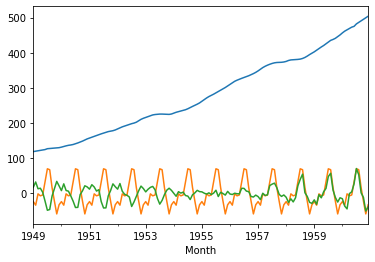

In [66]:
result.trend.plot()
result.seasonal.plot()
result.resid.plot()